
Closeness Coefficient and Ranking
        Model  Closeness  Rank
0        BART   0.830100   1.0
1          T5   0.647391   2.0
2     Pegasus   0.403570   5.0
3       GPT-2   0.596430   3.0
4  ProphetNet   0.563708   4.0


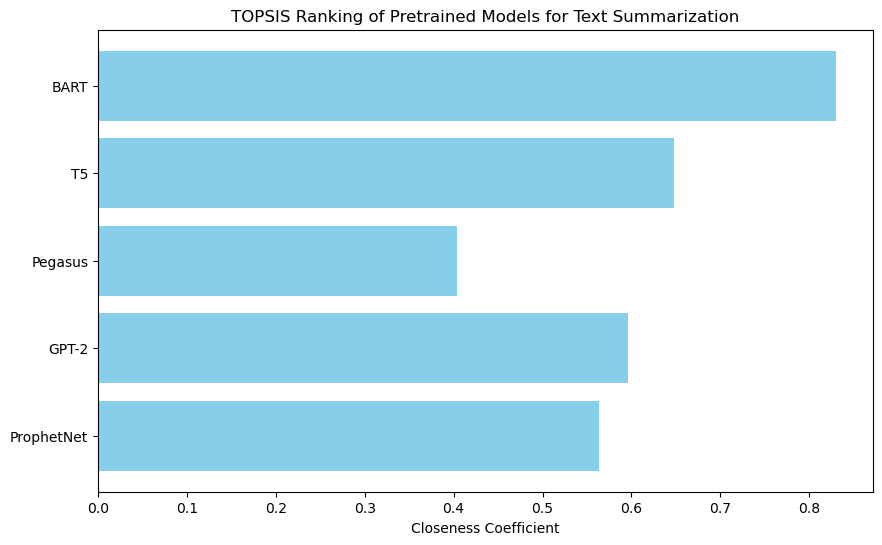

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = {
    'Model': ['BART', 'T5', 'Pegasus', 'GPT-2', 'ProphetNet'],
    'R1': [45, 43, 47, 38, 44],  
    'R2': [22, 20, 24, 15, 21],  
    'RL': [40, 38, 42, 35, 39],  
    'BERTScore': [85, 82, 88, 75, 84], 
    'Size (M Params)': [140, 220, 568, 117, 300], 
    'Inference Time (s)': [2.5, 3.0, 4.2, 1.8, 3.5]
}

weights = [0.25, 0.20, 0.20, 0.15, 0.10, 0.10]  
beneficial = [True, True, True, True, False, False] 


df = pd.DataFrame(data)
def normalize_matrix(df, beneficial):
    normalized_df = df.copy()
    for i, col in enumerate(df.columns[1:]):
        if beneficial[i]:
            normalized_df[col] = df[col] / np.sqrt(np.sum(df[col]**2))
        else:
            normalized_df[col] = df[col] / np.sqrt(np.sum(df[col]**2))
    return normalized_df

normalized_df = normalize_matrix(df, beneficial)


def apply_weights(normalized_df, weights):
    weighted_df = normalized_df.copy()
    for i, col in enumerate(weighted_df.columns[1:]):
        weighted_df[col] = weighted_df[col] * weights[i]
    return weighted_df

weighted_df = apply_weights(normalized_df, weights)


def ideal_solutions(weighted_df, beneficial):
    ideal_best = []
    ideal_worst = []
    for i, col in enumerate(weighted_df.columns[1:]):
        if beneficial[i]:
            ideal_best.append(weighted_df[col].max())
            ideal_worst.append(weighted_df[col].min())
        else:
            ideal_best.append(weighted_df[col].min())
            ideal_worst.append(weighted_df[col].max())
    return ideal_best, ideal_worst

ideal_best, ideal_worst = ideal_solutions(weighted_df, beneficial)



def euclidean_distances(weighted_df, ideal_best, ideal_worst):
    s_plus = []
    s_minus = []
    for i in range(len(weighted_df)):
        temp_plus = 0
        temp_minus = 0
        for j, col in enumerate(weighted_df.columns[1:]):
            temp_plus += (weighted_df[col].iloc[i] - ideal_best[j]) ** 2
            temp_minus += (weighted_df[col].iloc[i] - ideal_worst[j]) ** 2
        s_plus.append(np.sqrt(temp_plus))
        s_minus.append(np.sqrt(temp_minus))
    return s_plus, s_minus

s_plus, s_minus = euclidean_distances(weighted_df, ideal_best, ideal_worst)


def closeness_coefficient(s_plus, s_minus):
    closeness = []
    for i in range(len(s_plus)):
        closeness.append(s_minus[i] / (s_plus[i] + s_minus[i]))
    return closeness

closeness = closeness_coefficient(s_plus, s_minus)
df['Closeness'] = closeness
df['Rank'] = df['Closeness'].rank(ascending=False)
print("\nCloseness Coefficient and Ranking")
print(df[['Model', 'Closeness', 'Rank']])

# Visualize results
plt.figure(figsize=(10, 6))
plt.barh(df['Model'], df['Closeness'], color='skyblue')
plt.xlabel('Closeness Coefficient')
plt.title('TOPSIS Ranking of Pretrained Models for Text Summarization')
plt.gca().invert_yaxis()  
plt.show()